# 08-Linear regression

This notebook shows how to perform simple and multiple linear regression in Python.

So far, we have seen how to do simple data analysis, e.g. `value_counts`, `describe`, `corr` etc. 

In linear regression, we take the analysis one step further by estimating a line that quantifies the relationship between variables in our data. 

OLS (ordinary least squares) is the most common method for finding the regression line. In OLS, we find the intercept and slope of the line by minimizing the sum of the squared *residuals*, i.e, the difference between the predicted value by the line and the actual value.

<img src="images/sale_price_area.png" width = "45%" align="left"/>

We will use the OLS estimator from the package `statsmodels`. The sub-module `formula` allows us to fit statistical models using R-style formulas.

We import `statsmodels` by giving it the shorter name `smf`.

In [1]:
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('ggplot')

## Simple linear regression

In simple linear regression, we use data to estimate the relationship between a variable $y$ and a single variable $x$:

$y_i = \alpha + \beta x_i $

where:
- $y$ is the dependent variable
- $x$ is the explanatory (independent) variable
- $\alpha$ is the constant term (i.e., intercept)
- $\beta$ is the slope of the regression line

Let us explore the variation in cars' fuel economy (mpg).

In [3]:
mpg_df = pd.read_excel('data/mpg.xlsx')

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino


In [4]:
len(mpg_df)

398

By applying `corr` on the `DataFrame`, we see that there is a strong negative relationship between fuel economy and horsepower (-0.778).

In [5]:
mpg_df.corr(numeric_only = True)

,mpg,cylinders,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.842983,0.896017,-0.505419,-0.348746
horsepower,-0.778427,0.842983,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.416361,-0.306564,0.288137,1.000000


In [6]:
correlation = round(mpg_df.corr(numeric_only = True).loc['horsepower', 'mpg'], 2)

print(correlation)

-0.78


Let us create a scatter plot between `mpg` and `horsepower`, and add the correlation coefficient as a title to the plot.

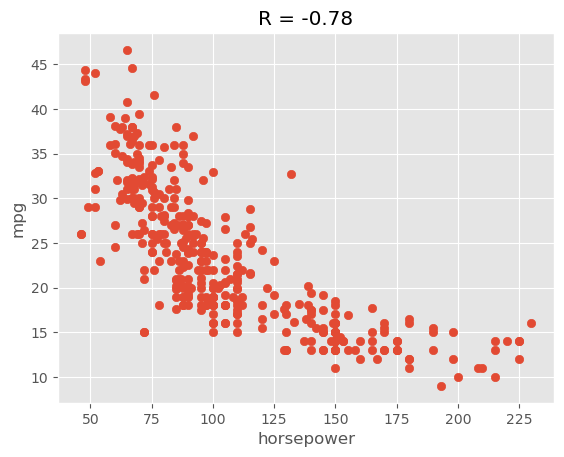

In [7]:
fig, ax = plt.subplots()

ax.scatter(mpg_df['horsepower'], mpg_df['mpg'])

# Add axis labels
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

# Add title
ax.set_title('R = ' + str(correlation))

plt.show()

However, note that there are a few missing observations in our data.

In [8]:
mpg_df.isna().sum()

mpg             0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

Before estimating a statistical model, we should use `dropna` in order to drop all rows with missing observations.

When applying `dropna` on a `DataFrame`, it will drop *all* rows with `NaN`. Therefore, we specify `subset = ['mpg', 'horsepower']` so that we only drop the rows with `NaN` in the columns that we will be using in our linear regression model.

In [9]:
mpg_df.dropna(subset = ['mpg', 'horsepower'], axis = 0, inplace = True)

len(mpg_df)

392

We are estimating the following model:

$mpg_i = \alpha + \beta \times horsepower_i$

We start by transforming the model to a R-style formula. Note that we do not have to add a constant term (i.e., intercept) to the model formula as it will be added automatically by `statsmodels`.

In [10]:
formula = 'mpg ~ horsepower'

print(formula)

mpg ~ horsepower


We create an OLS model by using the `ols` function from `statsmodels`. 

`ols` requires two inputs: 
1. model formula
2. data that we want to estimate the model with

In [11]:
# Create OLS model
model = smf.ols(formula, data = mpg_df)

After we have created the OLS model, we must apply `fit` on our model object in order to actually *estimate* the model.

In [12]:
# Estimate model
model = model.fit()

In [13]:
model

In order to see the regression results, we must apply `summary` on our fitted model object.

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        01:47:05   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The table contains a lof of information that is stored in the attributes of our fitted model object.

- The `param` attribute contains the model coefficients, i.e., intercept and slope:

In [15]:
model.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

In [16]:
model.params['horsepower']

np.float64(-0.15784473335365362)

- The `bse` attribute contains the standard errors of the coefficients:

In [17]:
model.bse

Intercept     0.717499
horsepower    0.006446
dtype: float64

- The `rsquared` and `rsquared_adj` attributes of contains the model's R-squared and adjusted R-squared.

In [18]:
model.rsquared

np.float64(0.6059482578894348)

In [19]:
model.rsquared_adj

np.float64(0.6049378688071001)

> 📝 **Note:** The R-squared measures the share of variation in the dependent variable (y) that is explained by our model. In this example, over 60% of the variation in cars' fuel economy in our data can be explained by the number of horsepower alone. Not bad for such a simple model!

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> The file <TT>survey_data.csv</TT> contains the results from a survey of 2,884 individuals regarding their earnings. Import the file and store it in a variable called <TT>df_wage</TT>:
    
1. Estimate a simple linear regression model in which hourly earnings (column <TT>hourly_earnings</TT>) is the dependent variable and years of schooling (column <TT>years_schooling</TT>) is the explanatory variable. Store the model in a variable called <TT>mod_wage</TT>.
2. Print the model's $\beta$ coefficient. Does hourly earnings change a lot for each additional year of schooling?
3. Print the model's adjusted R-squared. Does years of schooling appear to be a good predictor of variation in hourly earnings?

PS: Don't overwrite previous variable names.
    
</p>
</div>

In [20]:
df_wage = pd.read_csv('data/survey_data.csv', sep = ':')
df_wage.head()

,respondentID,age,hourly_earnings,years_schooling,sex,sector,experience
0,1,50,109.357913,9,male,private,30
1,2,50,267.671518,15,male,public,26
2,3,46,193.239479,15,female,public,29
3,4,41,206.217778,12,male,private,24
4,5,39,159.350102,12,female,private,19


In [21]:
formula_wage = 'hourly_earnings ~ years_schooling'

mod_wage = smf.ols(formula_wage, data = df_wage).fit()
mod_wage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        hourly_earnings   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     200.5
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           4.63e-44
Time:                        01:47:05   Log-Likelihood:                -17842.
No. Observations:                2884   AIC:                         3.569e+04
Df Residuals:                    2882   BIC:                         3.570e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          44.3438     12.181      3.640      0.000      20.459      68.229
years_schooling    12.2684      0.866     14.161      0.000      10.570      13.967
==============================================================================
Omnibus:                     6141.173   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         43337007.915
Skew:                          18.017   Prob(JB):                         0.00
Kurtosis:                     602.452   Cond. No.                         78.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
print(mod_wage.params)

Intercept          44.343817
years_schooling    12.268374
dtype: float64


In [23]:
print(mod_wage.rsquared.round(3))

0.065


#### In-sample prediction

Once we have estimated the OLS model, can use it to predict values of the dependent variable given observations of the explanatory variable. By creating these predictions, it also becomes easy to visualize the regression line.

To generate predictions, we apply `predict` on the fitted model object. 

`predict` will calculate the predicted value for the dependent variable using the estimates from the regression model and the observed value on the explanatory variable for each observation in the data that was used to estimate the model. This is known as *in-sample* prediction.

We can store the predictions in the original `DataFrame` by assigning the predicted values to a new column.

In [24]:
# Generate and store in-sample predictions
mpg_df['pred'] = model.predict(mpg_df)

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name,pred
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,19.416046
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320,13.891480
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite,16.259151
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst,16.259151
4,17.0,8,140.0,3449,10.5,70,usa,ford torino,17.837598


Let us create a line plot of `pred` on the $y$-axis, and `horsepower` on the $x$-axis. This will give us the regression line.

In [25]:
mpg_df.sort_values('horsepower', inplace = True)

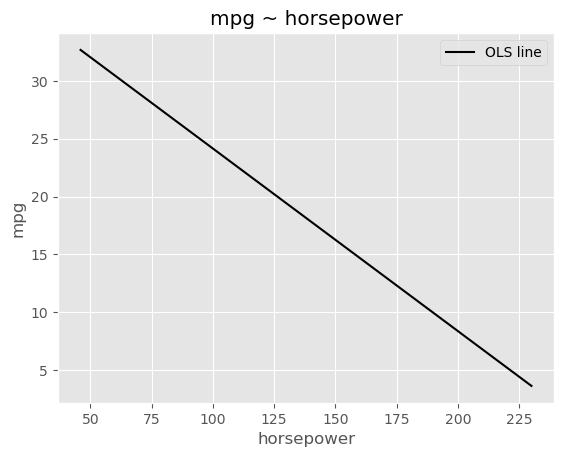

In [26]:
fig, ax = plt.subplots()

# Line plot
ax.plot(mpg_df['horsepower'], mpg_df['pred'], color = 'black', label = 'OLS line')

# Add axis labels
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

# Add title and legend
ax.set_title(formula)
ax.legend()

plt.show()

We can add a scatter plot of actual `mpg` and `horsepower` in the same plot with the regression line.

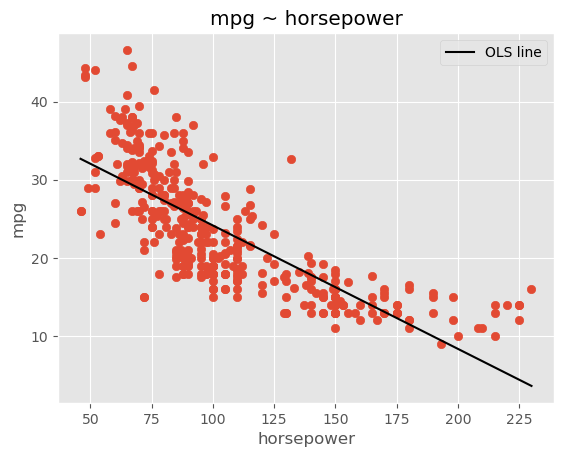

In [27]:
fig, ax = plt.subplots()

# Scatter plot
ax.scatter(mpg_df['horsepower'], mpg_df['mpg'])

# Line plot
ax.plot(mpg_df['horsepower'], mpg_df['pred'], color = 'black', label = 'OLS line')

# Add axis labels
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

# Add title and legend
ax.set_title(formula)
ax.legend()

plt.show()

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> Use the simple linear regression model from the previous exercise to generate in-sample predictions of hourly earnings given the observed years of schooling for each respondent in the survey data.
    
Show a scatter plot with years of schooling on the $x$-axis and hourly earnings on the $y$-axis, and add the regression line to the plot using the in-sample predictions.
</p>
</div>

In [28]:
df_wage['Prediction'] = mod_wage.predict(df_wage)
df_wage.sort_values('years_schooling', inplace = True)
df_wage.head()

,respondentID,age,hourly_earnings,years_schooling,sex,sector,experience,Prediction
424,425,41,96.339114,6,female,public,3,117.954058
1462,1463,33,40.618653,6,female,public,4,117.954058
2656,2657,45,115.606936,6,female,private,25,117.954058
1459,1460,45,202.312139,6,female,private,22,117.954058
1190,1191,37,231.213873,6,female,public,14,117.954058


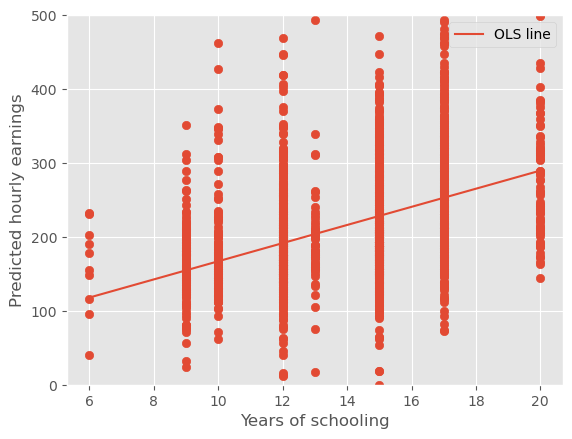

In [29]:
fig, ax = plt.subplots()

ax.scatter(
    df_wage['years_schooling'],
    df_wage['hourly_earnings'])

ax.plot(
    df_wage['years_schooling'],
    df_wage['Prediction'],
    label = 'OLS line'
)

ax.set_xlabel('Years of schooling')
ax.set_ylabel('Predicted hourly earnings')
ax.set_ylim(0,500)
ax.legend()

plt.show()

We can also inspect visually how well our fitted model explains variation in fuel economy:
- First, we plot *actual* `mpg` against *actual* `mpg`. This will create a 45 degree line.
- Second, we add a scatter plot of *actual* `mpg` and *predicted* `pred`.

The idea is that the closer the predictions in the scatter plot are to the 45 degree line, the better job does our model at explaining the variation in fuel economy.

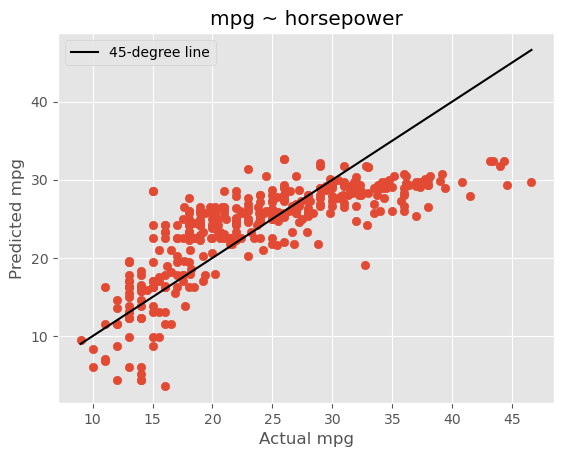

In [30]:
fig, ax = plt.subplots()

# 45 degree line
mpg_df.sort_values('mpg', inplace = True)
ax.plot(mpg_df['mpg'], mpg_df['mpg'], color = 'black', label = '45-degree line')

# Scatter plot
ax.scatter(mpg_df['mpg'], mpg_df['pred'])

# Formatting
ax.set_xlabel('Actual mpg')
ax.set_ylabel('Predicted mpg')
ax.set_title(formula)
ax.legend()

plt.show()

There are three potential cases for the observations in the scatter plot:
- Observation is below the 45 degree line &rarr; the model *underpredicts* `mpg`
- Observation is on the 45 degree line &rarr; the model correctly predicts `mpg`
- Observation is above the 45 degree line &rarr; the model *overpredicts* `mpg`

From the plot, we see that the model does a good job at predicting fuel economy at low levels of `mpg`. However, at high levels of `mpg`, the model systematically underpredicts the fuel economy of the car.

<div class = "alert alert-info">
<h3> Your turn </h3>
    
<p> Use the in-sample predictions from the previous exercise, and show a scatter plot with actual hourly earnings on the $x$-axis and predicted hourly earnings on the $y$-axis. Add a 45 degree line of actual hourly earnings in the plot. 
    
Does it seem like the linear regression model does a good job at predicting hourly earnings based only on years of schooling? Or does the model systematically over- or underpredict hourly earnings for some respondents?
    
</p>
</div>

In [118]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino


In [119]:
mpg_df.dropna(subset=['mpg', 'horsepower'], inplace=True)

In [120]:
formula1 = 'mpg ~ horsepower'

model1 = smf.ols(formula1, data = mpg_df)

In [121]:
model1 = model1.fit()

In [122]:
model1

In [123]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        01:53:55   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
model1.params

Intercept     39.935861
horsepower    -0.157845
dtype: float64

In [125]:
model1.rsquared

np.float64(0.6059482578894348)

In [126]:
mpg_df['Prediction'] = model1.predict(mpg_df)

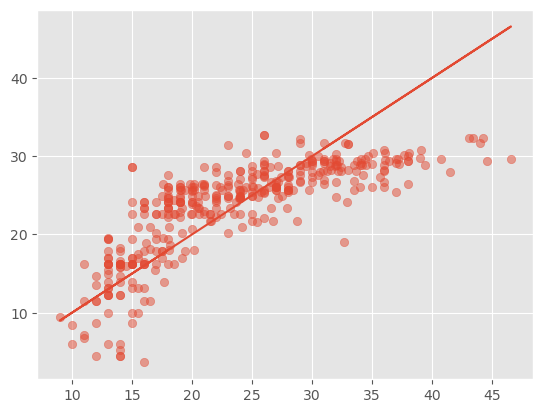

In [127]:
fig, ax = plt.subplots()

#45 degree line
ax.plot(
    mpg_df['mpg'],
    mpg_df['mpg'])

ax.scatter(
    mpg_df['mpg'],
    mpg_df['Prediction'],
    alpha = 0.5,
)

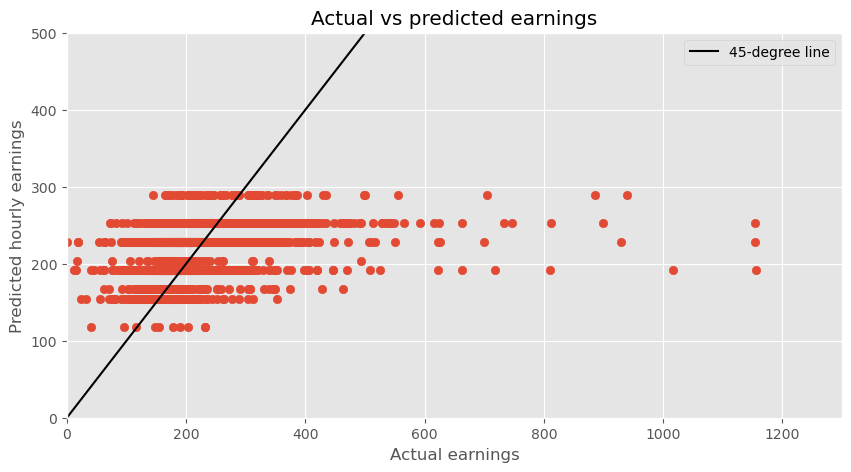

In [34]:
fig, ax = plt.subplots(figsize = (10,5))

#45 degree line
df_wage.sort_values('hourly_earnings', inplace = True)
ax.plot(df_wage['hourly_earnings'], df_wage['hourly_earnings'], color = 'k', label = '45-degree line')

#Scatter plot
ax.scatter(
    df_wage['hourly_earnings'],
    df_wage['Prediction'])

ax.set_ylim(0,500)
ax.set_xlim(0,1300)
ax.set_xlabel('Actual earnings')
ax.set_ylabel('Predicted hourly earnings')
ax.set_title('Actual vs predicted earnings')
ax.legend()

plt.show()

There are several other potential explanatory variables of fuel economy in our data. However, if we want to use a different variable than `horsepower`, we have two options:

- Re-write our program above using a new explanatory variable. Boring...
- Write a function that estimates an OLS model for any given explanatory variable. Fun 😀

Let us create two functions:

1. `get_predictions` estimates an OLS model given two inputs: 1) a model formula and 2) data. The function creates in-sample predictions and returns a *copy* of the original data with the predictions.

In [35]:
def get_predictions(formula, df):
    """Fit a linear regression model given a model formula and return df with in-sample predictions."""
    
    # Copy dataframe (important! Otherwise, we change the original df)
    df_copy = df.copy()
    
    # Create and fit OLS model
    model = smf.ols(formula, data = df_copy).fit()

    # Add predictions to copied dataframe
    df_copy['pred'] = model.predict(df_copy)
    
    return df_copy

2. `plot_predictions` plots the predictions along with the 45 degree line given two inputs: 1) a model formula and 2) data.

In [36]:
def plot_predictions(formula, df):
    """Plot in-sample predictions along 45-degree line given a model formula."""

    # Get yvar from formula
    depvar = formula.split('~')[0].strip()
    
    fig, ax = plt.subplots()

    # 45 degree line
    df.sort_values(depvar, inplace = True)
    ax.plot(df[depvar], df[depvar], color = 'black', label = '45-degree line')

    # Scatter plot
    ax.scatter(df[depvar], df['pred'])

    # Formatting
    ax.set_xlabel(depvar)
    ax.set_ylabel('pred')
    ax.set_title(formula)
    ax.legend()
    
    plt.show()

Let us re-run the estimation above, but using our new functions instead. 

We re-importing the data to remove columns with predictions from previous models.

In [37]:
mpg_df = pd.read_excel('data/mpg.xlsx')

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino


- Step 1: estimate the model and get in-sample predictions

In [38]:
# Define formula
formula = 'mpg ~ weight'

# Estimate model and get in-sample predictions (store in new df)
mpg_df_new = get_predictions(formula, mpg_df)

mpg_df_new.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name,pred
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,19.418523
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320,17.967643
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite,19.940532
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst,19.963562
4,17.0,8,140.0,3449,10.5,70,usa,ford torino,19.840736


In [39]:
# Note that original data has not been altered (because we copied the df)
# mpg_df.head()

- Step 2: Plot predictions along the 45 degree line

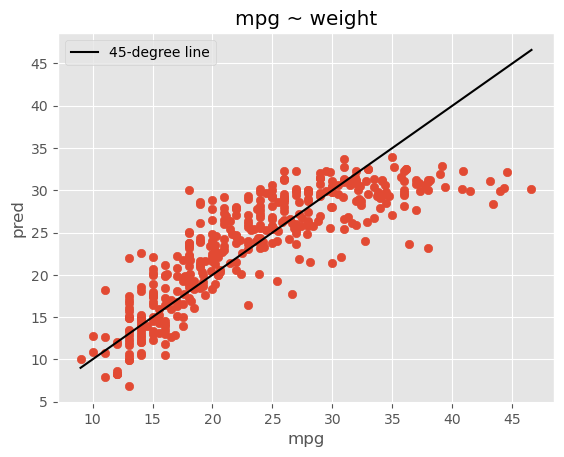

In [40]:
# Plot predictions
plot_predictions(formula, mpg_df_new)

> 📝  **Note:** Recall that it is possible to pass the output of a function call directly as an input to another function call in Python.

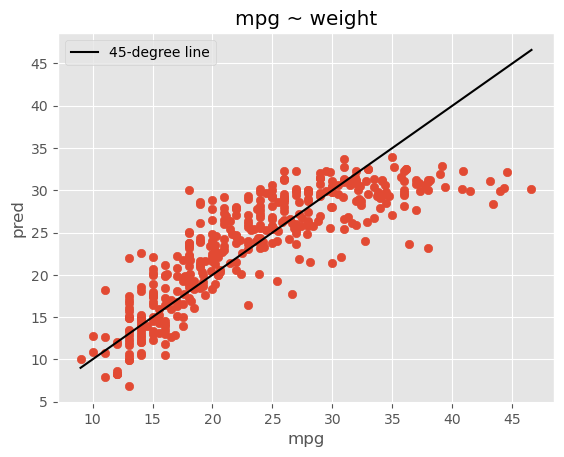

In [41]:
formula = 'mpg ~ weight'
plot_predictions(formula, get_predictions(formula, mpg_df))

## Multiple linear regression

In multiple linear regression, we expand the simple model to include multiple explanatory variables:

$y_i = \alpha + \beta_1 x_{i, 1} + \beta_2 x_{i, 2} + \beta_3 x_{i, 3}$ ...

In general, we can increase the explanatory power of our model (i.e., the R-squared) by including more explanatory variables. 

In [42]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df.dropna(inplace = True)

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,70,usa,ford torino


`corr` shows that there is also a high correlation between a car's fuel economy and its weight (-0.832).

In [43]:
mpg_df.corr(numeric_only = True)

,mpg,cylinders,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.842983,0.897527,-0.504683,-0.345647
horsepower,-0.778427,0.842983,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.416361,-0.309120,0.290316,1.000000


We will now estimate the following model:

$mpg_i = \alpha + \beta_1 \times horsepower_i + \beta_2 \times weight_i$

We expand the model formula with weight as an explanatory variable.

In [44]:
formula = 'mpg ~ horsepower + weight'

In [45]:
smf.ols(formula, data = mpg_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Thu, 27 Nov 2025   Prob (F-statistic):          3.06e-104
Time:                        01:47:05   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Let us use the functions that we created above to generate the prediction plot for the new model with the two explanatory variables `horsepower` and `weight`.

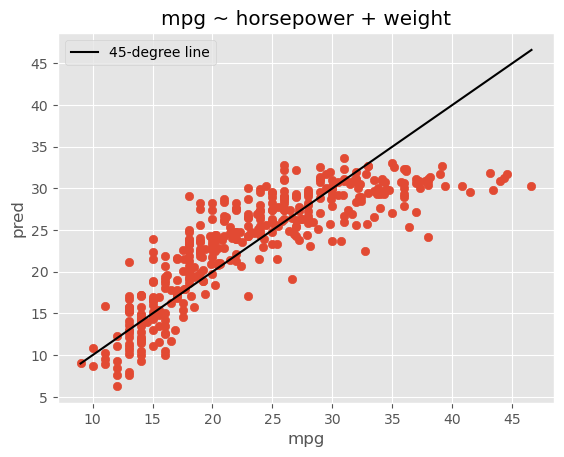

In [46]:
plot_predictions(formula, get_predictions(formula, mpg_df))

If the new model does a good job at explaining the variation in fuel economy, we would expect the predictions to be close to actual observations. However, we see that the model still underpredicts fuel economy for high levels of mpg despite including a second explanatory variable.

**Side note**: When a linear regression model includes more than one predictor (i.e., explanatory variable), we can no longer generate the regression line from the in-sample predictions.

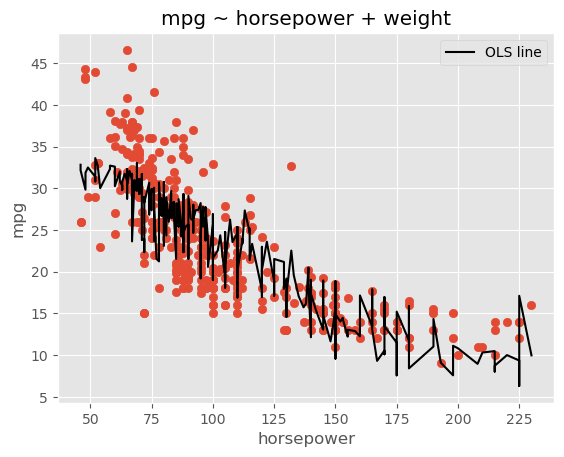

In [47]:
# Generate predictions from regression model with two explanatory variables
formula = 'mpg ~ horsepower + weight'
df_temp = get_predictions(formula, mpg_df)
df_temp.sort_values('horsepower', inplace = True)

fig, ax = plt.subplots()

# Scatter plot
ax.scatter(df_temp['horsepower'], df_temp['mpg'])

# Line plot
ax.plot(df_temp['horsepower'], df_temp['pred'], color = 'black', label = 'OLS line')

# Add axis labels
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

# Add title and legend
ax.set_title(formula)
ax.legend()

plt.show()

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> Expand the simple linear regression model from previous exercises to also take into account the number of years of work experience:

- Estimate the model: $hourly\_earnings_i = \alpha + \beta_1 \times years\_schooling_i + \beta_2 \times experience_i$
- Print the model's adj. R-squared. Does including years of experience improve the explanatory power of the model?
- Generate the in-sample predictions from the model and display a scatter plot of actual vs predicted hourly earnings along the 45-degree line.
    
</p>
</div>

                            OLS Regression Results                            
Dep. Variable:        hourly_earnings   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           1.12e-54
Time:                        01:47:06   Log-Likelihood:                -17815.
No. Observations:                2884   AIC:                         3.564e+04
Df Residuals:                    2881   BIC:                         3.565e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -18.2476     14.719     

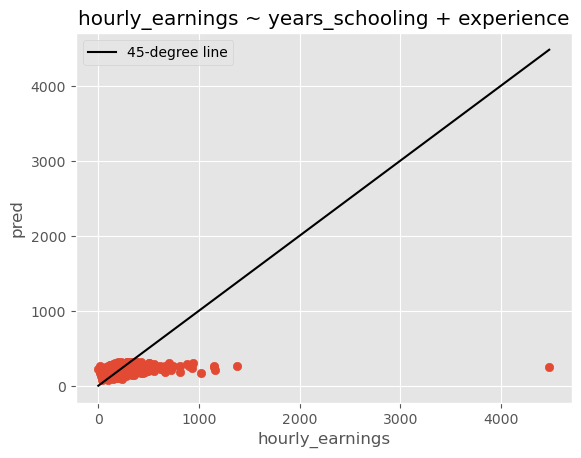

In [48]:
formula2 = 'hourly_earnings ~ years_schooling + experience'
print(smf.ols(formula2, data = df_wage).fit().summary())
plot_predictions(formula2, get_predictions(formula2,df_wage)) 

#### Polynomials

Polynomial regression is a good option when the relationship between the dependent and explanatory variables does not seem to be linear. Instead of estimating a regression line, we fit a *curve* to the data. 

<img src="images/polynomial_regression.png" width = "65%" align="left"/>

In fact, in our fuel economy data, there seems to be a non-linear relationship between cars' fuel economy and horsepower.

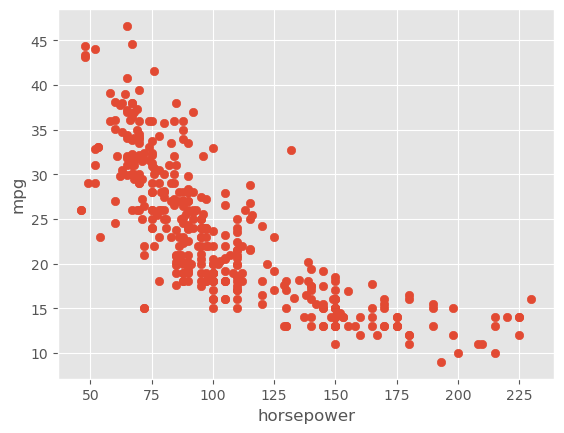

In [49]:
mpg_df = pd.read_excel('data/mpg.xlsx')
mpg_df.dropna(subset = ['horsepower', 'mpg'], inplace = True)

fig, ax = plt.subplots()

ax.scatter(mpg_df['horsepower'], mpg_df['mpg'])

ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

plt.show()

Instead of estimating a linear regression model, we now estimate a polynomial model. Specifically, we estimate a 2nd order polynomial model by adding the *square* of the explanatory variable to our model formula:

$mpg_i = \alpha + \beta_1 \times horsepower_i + \beta_2 \times horsepower_i^2$

In R-style formula, we can include the squared explanatory variable by adding the term `I(horsepower**2)`. 

In [50]:
f_poly = 'mpg ~ horsepower + I(horsepower**2)'

In [51]:
# Estimate OLS model
model_poly = smf.ols(f_poly, mpg_df).fit()

# Model summary
model_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           5.40e-99
Time:                        01:47:06   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1.800     31.604      0.000      53.360      60.440
horsepower            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
I(horsepower ** 2)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can again use our function `get_predictions` to generate a new `DataFrame` with the in-sample predictions, but now from our polynomial model.

In [52]:
# Create in-sample predictions
mpg_df = get_predictions(f_poly, mpg_df)

mpg_df.head()

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name,pred
0,18.0,8,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,17.091508
1,15.0,8,165.0,3693,11.5,70,usa,buick skylark 320,13.480156
2,18.0,8,150.0,3436,11.0,70,usa,plymouth satellite,14.658717
3,16.0,8,150.0,3433,12.0,70,usa,amc rebel sst,14.658717
4,17.0,8,140.0,3449,10.5,70,usa,ford torino,15.752059


We can then use `plot_predictions` to visually inspect how well the model predicts.

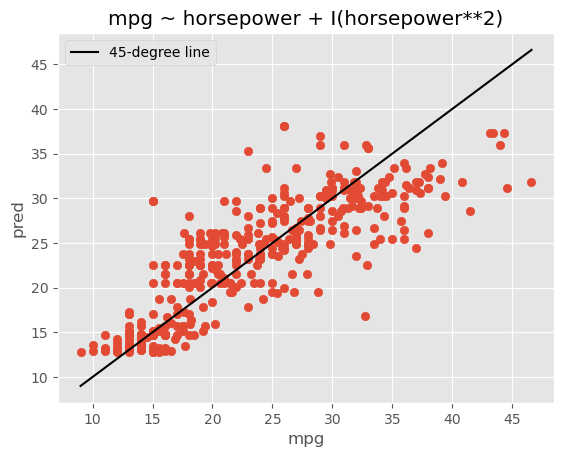

In [53]:
plot_predictions(f_poly, mpg_df)

From the plot, it seems that 2nd order polynomial model does a better job at predicting fuel economy compared to the simple regression model, although the model still slightly underpredicts fuel economy at high levels of `mpg`.

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> Expand the multiple linear regression model from the previous exercise with the following polynomial term:

$hourly\_earnings_i = \alpha + \beta_1 \times years\_schooling_i + \beta_2 \times experience_i + \beta_3 \times experience_i^2$

Display a scatter plot of actual vs predicted hourly earnings from the model along the 45 degree line. Does it seem like adding the polynomial term has improved the model's ability to predict the hourly earnings of the respondents?

</p>
</div>

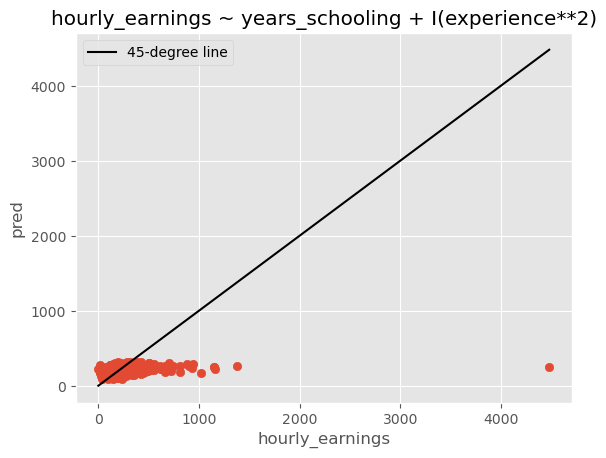

In [54]:
e_poly = 'hourly_earnings ~ years_schooling + I(experience**2)'
e_poly_model = smf.ols(e_poly, df_wage).fit()
e_poly_model.summary()

df_wage = get_predictions(e_poly, df_wage)
plot_predictions(e_poly, df_wage)

**Side note**: Although our model of fuel economy is no longer a simple regression model due to the second polynomial term, note that we are technically still using only one variable (i.e., horsepower) to explain variation in fuel economy. In that case, we can visualize the regression line using the predicted values the same way as before. 

In [55]:
mpg_df.sort_values('horsepower', inplace = True)

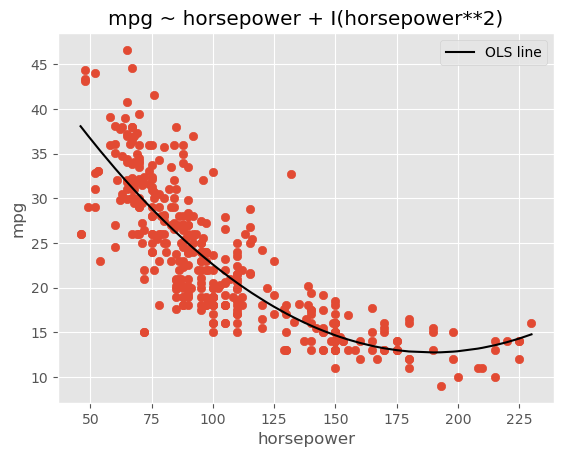

In [56]:
fig, ax = plt.subplots()

# Line plot
ax.plot(mpg_df['horsepower'], mpg_df['pred'], color = 'black', label = 'OLS line')

# Scatter plot
ax.scatter(mpg_df['horsepower'], mpg_df['mpg'])

# Formatting
ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')
ax.set_title(f_poly)
ax.legend()

plt.show()

#### Categorical variables

So far, we have only used *numerical* variables as explanatory variables in our regression models. 

However, in data analysis, we often work with *categorical* data, i.e., observations are categories/labels and not numbers. For example, in timeseries data, we cannot say that the value "January" is smaller or larger than the value "July", or that "1am" is more or less than "3pm".

However, we can still use non-numerical variables as a explanatory variables in regression models, but we must include then as *categorical* variables. Such variables are also known as factor or indicator variables.

Note that our `mpg` data contains the categorical variable `origin`. In fact, the average fuel economy is very different for cars from the US compared to cars from Europe and Japan, and `origin` could therefore be an important explanatory variable.

In [57]:
mpg_df.groupby('origin')['mpg'].mean()

origin
europe    27.602941
japan     30.450633
usa       20.033469
Name: mpg, dtype: float64

In R-style formula, we can include categorical variables by adding the term `C(origin)`. 

In [58]:
f_cat = 'mpg ~ horsepower + C(origin)'

> 📝  **Note:** By adding categorical variables in a regression model, we create a different constant term for each group/category in the data, i.e., the regression line has a different intercept for each group.

From the regression results below, we see that there is still a negative relationship between `mpg` and `horsepower`. 

However, there is now a different intercept for American, Japanese and European cars. The intercept for European cars is 38.3695, while the intercept is +2.7510 higher for Japanese cars and -2.4253 lower for American cars. This means that Japanese cars tend to be more fuel efficient than European cars, and European cars are more fuel efficient than American cars, even when they have the same number of horsepower.

In [59]:
smf.ols(f_cat, mpg_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     253.4
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           4.93e-91
Time:                        01:47:06   Log-Likelihood:                -1148.5
No. Observations:                 392   AIC:                             2305.
Df Residuals:                     388   BIC:                             2321.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.3695      0.781     49.098      0.000      36.833      39.906
C(origin)[T.japan]     2.7510      0.753      3.651      0.000       1.270       4.232
C(origin)[T.usa]      -2.4253      0.678     -3.578      0.000      -3.758      -1.093
horsepower            -0.1336      0.007    -19.474      0.000      -0.147      -0.120
==============================================================================
Omnibus:                       23.486   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.987
Skew:                           0.602   Prob(JB):                     2.27e-06
Kurtosis:                       3.376   Cond. No.                         501.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As before, we can use our function `plot_predictions` to plot the predictions from the model with `origin` along the 45 degree line. 

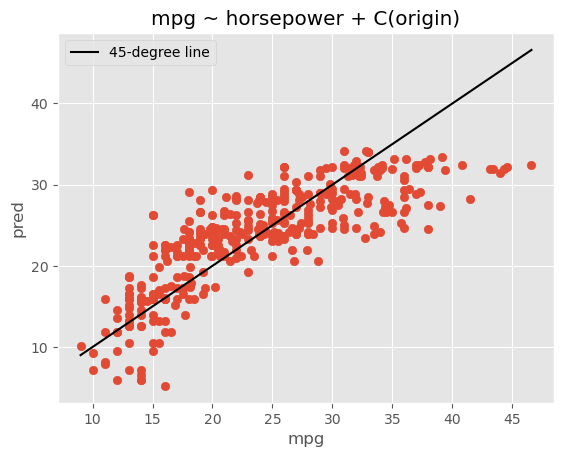

In [60]:
plot_predictions(f_cat, get_predictions(f_cat, mpg_df))

<div class = "alert alert-info">
<h3> Your turn</h3>
    
<p> Estimate a multiple linear regression model of hourly earnings that also takes into account whether the respondent works in the public or private sector. Use the survey data and estimate the model

$hourly\_earnings_i = \alpha + \beta_1 \times years\_schooling_i + \beta_2 \times experience_i + \beta_3 \times sector_i$,

where $sector_i$ is a categorical variable ("private" or "public"). 

On average, how much less do respondents in the public sector earn compared to respondents in the private sector?

</p>
</div>

#### Categorical vs numerical

In reality, datasets often have variables that can be interpreted both as categorical and numerical. 

For example, in `mpg`, should we interpret `cylinders` as a numerical variable or a categorical variable? Although the variable is numerical (int), it has only a few unique values and could potentially by included as a categorical variable in a regression model.

In [61]:
mpg_df['cylinders'].unique()

array([4, 5, 6, 8, 3])

Let us first estimate a regression model with both `horsepower` and `cylinders` as numerical variables.

In [62]:
# Define model formula
f_cyl_num = 'mpg ~ horsepower + cylinders'

# Estimate OLS model and show output
model_cyl_num = smf.ols(f_cyl_num, mpg_df).fit()
model_cyl_num.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     372.4
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           4.38e-91
Time:                        01:47:06   Log-Likelihood:                -1151.5
No. Observations:                 392   AIC:                             2309.
Df Residuals:                     389   BIC:                             2321.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.9484      0.779     55.147      0.000      41.417      44.480
horsepower    -0.0861      0.011     -7.693      0.000      -0.108      -0.064
cylinders     -1.9198      0.253     -7.600      0.000      -2.416      -1.423
==============================================================================
Omnibus:                       27.601   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.550
Skew:                           0.614   Prob(JB):                     8.55e-08
Kurtosis:                       3.695   Cond. No.                         380.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Alternatively, we can instead estimate a model in which we include `cylinders` as a categorical variable.

In [63]:
# Define model formula
f_cyl_cat = 'mpg ~ horsepower + C(cylinders)'

# Estimate OLS model and show output
model_cyl_cat = smf.ols(f_cyl_cat, mpg_df).fit()
model_cyl_cat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     184.1
Date:                Thu, 27 Nov 2025   Prob (F-statistic):          7.55e-100
Time:                        01:47:06   Log-Likelihood:                -1122.2
No. Observations:                 392   AIC:                             2256.
Df Residuals:                     386   BIC:                             2280.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.7761      2.413     12.755      0.000      26.032      35.520
C(cylinders)[T.4]     6.5734      2.169      3.030      0.003       2.308      10.838
C(cylinders)[T.5]     5.0737      3.267      1.553      0.121      -1.349      11.496
C(cylinders)[T.6]    -0.3441      2.186     -0.157      0.875      -4.642       3.954
C(cylinders)[T.8]     0.4974      2.276      0.218      0.827      -3.978       4.973
horsepower           -0.1030      0.011     -9.095      0.000      -0.125      -0.081
==============================================================================
Omnibus:                       48.549   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.656
Skew:                           0.800   Prob(JB):                     1.01e-16
Kurtosis:                       4.396   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Despite both models including `cylinders` as an explanatory variable, we see that including `cylinders` as a categorical variable actually increases the explanatory power of our model (i.e., adj. R-squared) from 65.5 to 70.1%

In [64]:
print(round(model_cyl_num.rsquared_adj, 3))

0.655


In [65]:
print(round(model_cyl_cat.rsquared_adj, 3))

0.701


# Home exercises

### 📚 Exercise 1: Outliers in hourly earnings

The file `survey_data.csv` contains information on the hourly earnings (in DKK) of 2,884 respondents. In statistical analysis, the presence of outliers (i.e., extreme values) can have a large impact on the results of the estimation and how well the model predicts the observed outcome. Therefore, in this exercise, you will investigate the presence of outliers in the survey data and its effect on the estimates from a linear regression model.

**Task 1**: Load the data and do the following:
- Calculate the number of respondents that had an hourly wage of less than 10 DKK or above 1000 DKK.
- Calculate the average hourly wage for males and females in the private and public sector.
- Create a single plot that shows histograms of the hourly earnings for males and females seperately.

**Task 2**: Create a function called `get_beta` that estimates a regression model and returns the beta coefficient for a specific explanatory variable. The function should take three inputs: `df` (the dataset), `formula` (formula for the regression model), and `exp` (column name of an explanatory variable). 

Test the function by estimating the following regression model

$hourly\_earnings_i = \alpha + \beta_1 \times years\_schooling_i + \beta_2 \times experience_i + \beta_3 \times experience_i^2$,

and print the $\beta$-coefficient on the number of years of schooling.

**Task 3**: There are some respondents in the data that have an extremely high or low hourly wage. We want to explore how much dropping a single observation, i.e., respondent, from our data affects the estimated coefficient on years of schooling in the regression model from the previous task. 

1. Write a `for` loop where you in each iteration:
    - drop an observation from the data
    - use `get_beta` to retrieve the coefficient on years of schooling
    - store the coefficient in a list
   
   *Note*: In the first iteration you should drop the first respondent from the data. In the second iteration you should keep the first respondent but drop the second respondent. In the third iteration you should keep the first and second respondents, but drop the third one, and so on...
    
2. Use the list with the estimated coefficients on years of schooling from the previous task and display the distribution of the coefficients in a histogram. What is your verdict? Does it seem that the $\beta$ coefficient on `years_schooling` is affected by the presence of outliers?


In [66]:
df_wage = pd.read_csv('data/survey_data.csv', sep = ':')
df_wage.head()

,respondentID,age,hourly_earnings,years_schooling,sex,sector,experience
0,1,50,109.357913,9,male,private,30
1,2,50,267.671518,15,male,public,26
2,3,46,193.239479,15,female,public,29
3,4,41,206.217778,12,male,private,24
4,5,39,159.350102,12,female,private,19


In [67]:
extremes = df_wage[(df_wage['hourly_earnings'] > 1000) | (df_wage['hourly_earnings'] < 10)]
len(extremes)

7

In [68]:
hourly = df_wage.groupby(['sex', 'sector'])['hourly_earnings'].mean().round(2)
hourly

sex     sector 
female  private    209.60
        public     194.29
male    private    234.37
        public     214.15
Name: hourly_earnings, dtype: float64

In [69]:
hourly_males = df_wage[df_wage['sex'] == 'male']['hourly_earnings']
hourly_females = df_wage[df_wage['sex'] == 'female']['hourly_earnings']

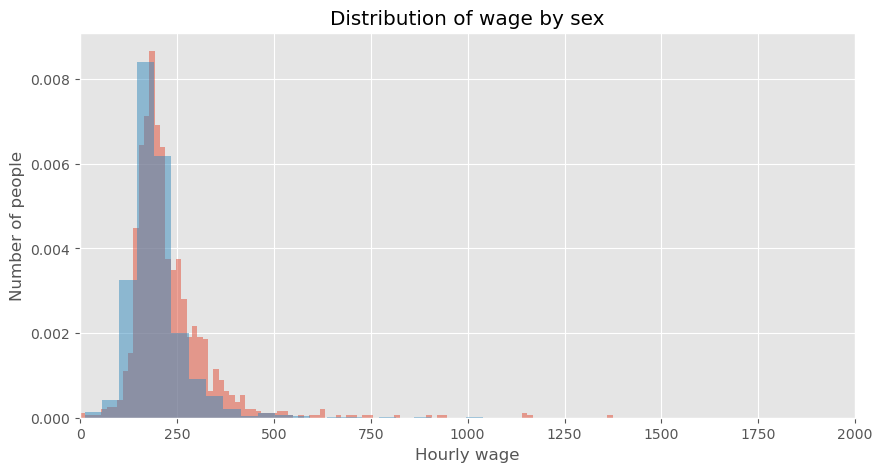

In [70]:
fig, ax = plt.subplots(figsize = (10, 5))

#Histogram: males
ax.hist(
    hourly_males,
    bins = 100,
    alpha = 0.5,
    label = 'Males',
    density = True
)

#Histogram: females
ax.hist(
    hourly_females,
    bins = 100,
    alpha = 0.5,
    label = 'Females',
    density = True
)



ax.set_xlabel('Hourly wage')
ax.set_ylabel('Number of people')
ax.set_title('Distribution of wage by sex')
ax.set_xlim(0,2000)

plt.show()

In [71]:
Task 2: Create a function called get_beta that estimates a regression model and returns the beta coefficient for a specific explanatory variable. The function should take three inputs: df (the dataset), formula (formula for the regression model), and exp (column name of an explanatory variable).

Test the function by estimating the following regression model

,

and print the -coefficient on the number of years of schooling.

SyntaxError: invalid syntax (2278840588.py, line 1)

**Task 2**: Create a function called `get_beta` that estimates a regression model and returns the beta coefficient for a specific explanatory variable. The function should take three inputs: `df` (the dataset), `formula` (formula for the regression model), and `exp` (column name of an explanatory variable). 

Test the function by estimating the following regression model

$hourly\_earnings_i = \alpha + \beta_1 \times years\_schooling_i + \beta_2 \times experience_i + \beta_3 \times experience_i^2$,

and print the $\beta$-coefficient on the number of years of schooling.

In [ ]:
def get_beta(df, formula, exp):

    #Create and fit OLS model
    model = smf.ols(formula, data = df).fit()

    #Return explanatory parameters
    return model.params[exp]

In [ ]:
formula = 'hourly_earnings ~ years_schooling + experience + I(experience**2)'

df_wage2 = df_wage.dropna(subset = ['hourly_earnings', 'years_schooling', 'experience'], axis = 0)

xvar = 'years_schooling'
coef = get_beta(df_wage2, formula, xvar)
print(f'One additional year of schooling is associated with a {coef:.2f} DKK change in hourly wage.')

**Task 3**: There are some respondents in the data that have an extremely high or low hourly wage. We want to explore how much dropping a single observation, i.e., respondent, from our data affects the estimated coefficient on years of schooling in the regression model from the previous task. 

1. Write a `for` loop where you in each iteration:
    - drop an observation from the data
    - use `get_beta` to retrieve the coefficient on years of schooling
    - store the coefficient in a list
   
   *Note*: In the first iteration you should drop the first respondent from the data. In the second iteration you should keep the first respondent but drop the second respondent. In the third iteration you should keep the first and second respondents, but drop the third one, and so on...
    
2. Use the list with the estimated coefficients on years of schooling from the previous task and display the distribution of the coefficients in a histogram. What is your verdict? Does it seem that the $\beta$ coefficient on `years_schooling` is affected by the presence of outliers?

In [ ]:
# Empty list to store beta coefficients
coef_lst = []

for i in df_wage2['respondentID'].unique():
    
    # Drop respondent i from sample
    df_temp = df_wage2.loc[df_wage2['respondentID'] != i]
    
    # Get beta coefficent
    coef = get_beta(df_temp, formula, xvar)
    
    # Append to list
    coef_lst.append(coef)

print(len(coef_lst))

print(max(coef_lst))
print(min(coef_lst))
print(np.mean(coef_lst))

### 📚 Exercise 2: Fuel economy and polynomials

We have estimated a 2nd order polynomial model in which we used the number of horsepower to explain variation in fuel economy. However, there could also be a non-linear relationship between fuel economy and other car attributes. Including polynomial terms can often improve the explanatory power of our regression models. Therefore, in this exercise, you will explore the adjusted R-squared from using different car attributes in a 2nd order polynomial model.


**Task 1**: Create a function called `get_rsqr` that estimates a regression model and returns the model's adjusted R-squared. The function should take two inputs: `df` (the dataset) and `formula` (formula for the regression model). Import the `mpg` data and test the function by estimating the model

$mpg_i = \alpha + \beta_1 \times horsepower_i + \beta_2 \times horsepower_i^2$,

and print the adjusted R-square from the model.

**Task 2**: We now want to compare the adjusted R-squared from the 2nd order polynomial model in the previous task, but using four different car attributes: `horsepower`, `weight`, `acceleration` and `model_year`. 

Write a `for` loop where you in each iteration:
- Update the model formula for the polynomial model to include one of the four car attributes
- Use the function `get_rsqr` to get the adjusted R-squared from the model.
- Print the adjusted R-squared from each of the polynomial models
    
*Note*: In each iteration, the polynomial model should include only one car attribute. In the first iteration, the model should use `horsepower`; in the second iteration, the model should use `weight`; and so on.

Which 2nd order polynomial model has the highest adj. R-squared?

**Task 3**: In addition to comparing the adjusted R-squared, we also want to inspect the estimated regression line from each of the polynomial models with the four different car attributes: `horsepower`, `weight`, `acceleration` and `model_year`. 

Create a single graph with four subplots side-by-side (1x4). In each subplot:
- Show a scatter plot with one of the car attributes on the $x$-axis and `mpg` on the $y$-axis.
- Show the regression line using the in-sample predictions from the polynomial model with the car attrbitue
- Add the adjusted R-squared from the polynomial model in the title of the sub-plot

*Hint*: Use a `for` loop to iterate over the axes object to avoid duplicating the code for generating each subplot. Note also that you can use the function `get_predictions` from the lecture to get a `DataFrame` with the in-sample predictions for each polynomial model.
    

### 📚 Exercise 3: Drivers of CO2 emissions

In this exercise, you are asked to explore CO2 emissions around the world, and potential drivers for why some countries have higher emissions than other countries. To do this, you are given two datasets.

The first file `co2_emissions.csv` contains the following country-level data on CO2 emissions in 2021:
- `country`: Country name
- `year`: Year of observation
- `co2_total`: Total carbon dioxide (CO2) emissions (Mt CO2e)
- `population`: Total population

In addition, the file contains data on the following six potential explanatory variables of country-level CO2 emissions: 
- `urban`: Urban population (% of total population)
- `gdp_pc`: GDP per capita (current US$)
- `electricity`: Access to electricity (% of population)
- `agriculture`: Agricultural land (% of land area)
- `nat_resources`: Total natural resources rents (% of GDP)
- `renew_energy`: Renewable energy consumption (% of total final energy consumption)

Note that the emissions dataset contains data not only for countries, but also for aggregates such as "Africa Eastern and Southern" and "Heavily indebted poor countries (HIPC)". 

The second file `country_info.csv` contains information about the countries and aggregates observed in the emissions dataset:
- `name`: Name of the location (country or aggregate)
- `region`: Region of the location
- `incomeLevel`: Income level of the location (e.g., "Low income")

**Task 1**: Create a dataset that contains countries only:

1. Import and merge the two datasets. Explore the merged data, e.g., data types, missing values, unique values etc.
2. Drop all observations that are not countries, e.g., "Africa Eastern and Southern" so that the data contains observations for countries only.
3. Create a new column called `co2_pc`, which is the *per capita* CO2 emissions (t CO2e/capita) for each country.

   *Hint*: Multiple total CO2 emissions with 1,000,000 to convert from million tons to tons (otherwise, you'll get very small numbers).

**Task 2**: Use the country-level dataset from the previous task to visualize CO2 emissions across countries: 

1. Create a figure with two subplots:
    - In the first subplot, show a scatter plot of total population (`population`) and per capita CO2 emissions (`co2_pc`).
    - In the second subplot, show a histogram of the distribution of per capita CO2 emissions (`co2_pc`).
   
   From the plots, are there any outliers in the data?
   
2. Create a figure with 6 subplots (either 2x3 or 3x2):
    - In each subplot, show a scatter plot of per capita CO2 emissions (`co2_pc`) and one of the potential explanatory variables of emissions (`urban`, `gdp_pc`, `electricity`, `agriculture`, `nat_resources`, `renew_energy`).
    - Add the correlation coefficient between the explanatory variable and per capita CO2 emissions in the  title of the subplot.

   *Hint*: To avoid using a nested `for` loop to generate the 2x3 or 3x2 plot, you can apply the `flatten` method on the `ax` object to create a one-dimensional object that you can use a single `for` loop to iterate over.

**Task 3**: You will now estimate a multiple linear regression model where per-capita CO2 emissions (`co2_pc`) is the depdenent variable, and the model includes three out of the six potential explanatory variables: `urban`, `gdp_pc`, `electricity`, `agriculture`, `nat_resources`, `renew_energy`. 

*Note*: Do not include any polynomial terms in the model.

In general, there are 20 possible combinations when you can choose three explanatory variables from six different variables. Your task is to find the combination of three variables that has the highest adjusted R-squared. 

Write a `for` loop in which you loop over the 20 possible combinations of three explanatory variables. For each possible combination:
- Estimate the linear regression model: $co2\_pc_i = \alpha + \beta_1 \times X1_i + \beta_2 \times X2_i + \beta_3 \times X3_i$
- Extract the adjusted R-squared from the model

Which combination of explanatory variables has the highest adjusted R-squared?

*Hint*: The function `combinations` from `itertools` can be used to generate all possible combinations from a set of values (see [here](https://www.geeksforgeeks.org/python/python-itertools-combinations-function/)).